In [26]:
# see the value of multiple statements at once
# output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to suppress the warnings

import warnings
warnings.filterwarnings('ignore')

In [27]:
# importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math
import time
import itertools as it


# This magic command line tells the notebook to show plots inline
%matplotlib inline

# Set a style/theme to the plots
sns.set_style(style='darkgrid')
plt.style.use('ggplot')

In [28]:
df = pd.read_csv('data_2_var.csv')

In [29]:
df.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [30]:
df.shape

(1110, 2)

In [31]:
print(df.rename(columns={'-122.7406674': 'x', '-130.5720846': 'y'}))

               x           y
0    -121.531419 -129.938929
1    -134.917019 -130.141832
2    -120.605951 -125.760932
3    -129.894781 -112.785214
4    -134.366669 -116.000000
...          ...         ...
1105 -115.366669  121.000000
1106 -119.954237  123.609122
1107 -109.942155  127.197394
1108 -111.515368  128.170885
1109 -110.344221  123.087950

[1110 rows x 2 columns]


In [32]:
df.dtypes

-122.7406674    float64
-130.5720846    float64
dtype: object

In [33]:
df.isnull().sum()

-122.7406674    0
-130.5720846    0
dtype: int64

In [34]:
df.isnull().head()

,-122.7406674,-130.5720846
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [35]:
#Summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
-122.7406674,1110.0,6.899714,79.324069,-134.962839,-53.366669,15.739103,76.193907,134.605775
-130.5720846,1110.0,-26.093318,69.755980,-132.422167,-76.994298,-46.036319,7.598960,134.425495


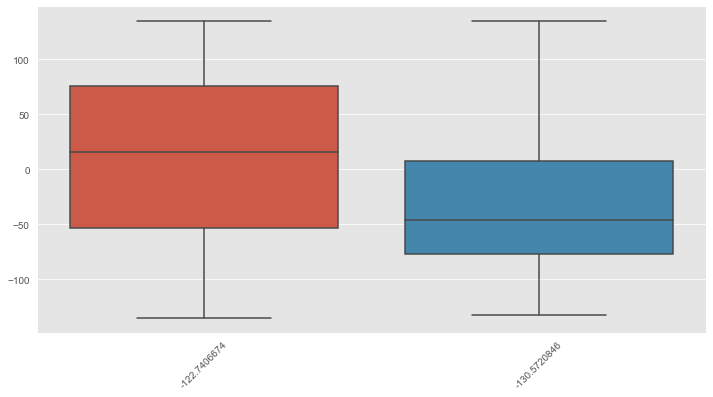

In [39]:
# Box plot for checking the outliers

plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [44]:
Q1 = df['-122.7406674'].quantile(0.25)
Q3 = df['-122.7406674'].quantile(0.75)
Q1, Q3

(-53.366668700000005, 76.19390685)

In [45]:
IQR = Q3 - Q1
IQR

129.56057555

In [46]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-247.70753202500003, 270.534770175)

In [47]:
df[(df['-122.7406674']<lower_limit)|(df['-122.7406674']>upper_limit)]

,-122.7406674,-130.5720846


In [48]:
Q1 = df['-130.5720846'].quantile(0.25)
Q3 = df['-130.5720846'].quantile(0.75)
Q1, Q3

(-76.99429755, 7.598959891)

In [49]:
IQR = Q3 - Q1
IQR

84.59325744099999

In [50]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-203.8841837115, 134.48884605249998)

In [51]:
df[(df['-130.5720846']<lower_limit)|(df['-130.5720846']>upper_limit)]

,-122.7406674,-130.5720846


# Observations:
 - The values obtained less than lower limit and more than upper limit is '0'.
 - There were no outliers.

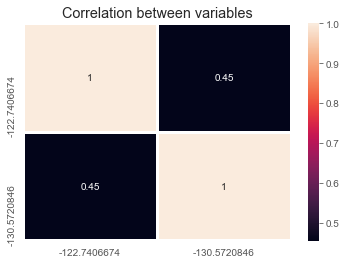

In [37]:
#Correlation Matrix

sns.heatmap(df.corr(), annot=True, linewidth=2)
plt.title("Correlation between variables")
plt.show();

In [38]:
df.corr()

,-122.7406674,-130.5720846
-122.7406674,1.000000,0.454607
-130.5720846,0.454607,1.000000


# Splitting the data into Train and Test

In [92]:
X =df.loc[:,df.columns!="-122.7406674"]
print(X)

      -130.5720846
0             -129
1             -130
2             -125
3             -112
4             -116
...            ...
1105           121
1106           123
1107           127
1108           128
1109           123

[1110 rows x 1 columns]


In [93]:
y =df.loc[:,df.columns!="-130.5720846"]
print(y)

      -122.7406674
0             -121
1             -134
2             -120
3             -129
4             -134
...            ...
1105          -115
1106          -119
1107          -109
1108          -111
1109          -110

[1110 rows x 1 columns]


In [94]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test, = train_test_split(X,y,test_size = 0.25 , random_state =0)

In [96]:
#check for sample data

print(X_Train.shape)
print(y_Train.shape)
print(X_Test.shape)
print(y_Test.shape)


(832, 1)
(832, 1)
(278, 1)
(278, 1)


# There are 3 main metrics for model evaluation in regression:
1. R Square/Adjusted R Square
2. Mean Square Error(MSE)/Root Mean Square Error(RMSE)
3. Mean Absolute Error(MAE)

# Multiple linear regression

In [118]:
#fit a model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
lm = LinearRegression()
model1 = lm.fit(X_Train, y_Train)
predictions1 = lm.predict(X_Test)
m1=model1.score(X_Test, y_Test)
RMSE1=np.sqrt(metrics.mean_squared_error(y_Test, predictions1))
print('Accuracy of model is', model1.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions1)))

Accuracy of model is 0.21911728321518287
Mean Absolute Error: 58.29939142394815
Mean Squared Error: 4888.826534323042
Root Mean Squared Error: 69.9201439809948


In [120]:
# Model 2: LASSO Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
las = Lasso(alpha=0.1)
model2 = las.fit(X_Train, y_Train)
predictions2 = las.predict(X_Test)
m2=model2.score(X_Test, y_Test)
RMSE2=np.sqrt(metrics.mean_squared_error(y_Test, predictions2))
print('Accuracy of model is', model2.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions2)))

Accuracy of model is 0.2191175757476983
Mean Absolute Error: 58.29968310902067
Mean Squared Error: 4888.824702881915
Root Mean Squared Error: 69.92013088433055


In [121]:
# Model: Random forest regression

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Rnd = RandomForestRegressor(ccp_alpha=0.0)
model4 = Rnd.fit(X_Train, y_Train)
predictions4 = Rnd.predict(X_Test)
m4=model4.score(X_Test, y_Test)
RMSE4=np.sqrt(metrics.mean_squared_error(y_Test, predictions4))
print('Accuracy of model is', model4.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions4)))

Accuracy of model is 0.4196517806270027
Mean Absolute Error: 41.51811991277463
Mean Squared Error: 3633.3519913204514
Root Mean Squared Error: 60.27729250157518


In [122]:
# Model : Decision tree regression

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
dtr = DecisionTreeRegressor(ccp_alpha=0.0)
model5 = dtr.fit(X_Train, y_Train)
predictions5 = dtr.predict(X_Test)
m5=model5.score(X_Test, y_Test)
RMSE5=np.sqrt(metrics.mean_squared_error(y_Test, predictions5))
print('Accuracy of model is', model5.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions5)))

Accuracy of model is 0.4095462459728474
Mean Absolute Error: 41.25962512002504
Mean Squared Error: 3696.6191182510747
Root Mean Squared Error: 60.799828274848565


In [123]:
# Model : SVM regression

from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn import metrics
svm= svm.SVR(kernel='linear')
model7 = svm.fit(X_Train, y_Train)
predictions7 = svm.predict(X_Test)
m7=model7.score(X_Test, y_Test)
RMSE7=np.sqrt(metrics.mean_squared_error(y_Test, predictions7))
print('Accuracy of model is', model7.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions7))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions7))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions7)))

Accuracy of model is 0.10657978181292127
Mean Absolute Error: 51.024330584312196
Mean Squared Error: 5593.383455786322
Root Mean Squared Error: 74.78892602375248


In [117]:
# Model 6: KNN regression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
knn = KNeighborsRegressor(n_neighbors=2)
model6 = knn.fit(X_Train, y_Train)
predictions6 = knn.predict(X_Test)
m6=model6.score(X_Test, y_Test)
RMSE6=np.sqrt(metrics.mean_squared_error(y_Test, predictions6))
print('Accuracy of model is', model6.score(X_Test, y_Test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_Test, predictions6))  
print('Mean Squared Error:', metrics.mean_squared_error(y_Test, predictions6))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_Test, predictions6)))

Accuracy of model is 0.27637807980188434
Mean Absolute Error: 46.78237410071942
Mean Squared Error: 4530.337230215828
Root Mean Squared Error: 67.30777986396393


In [127]:
# Model Comparison
height = [m1, m2, m4, m5, m6, m7]
bars = ('Linear', 'Lasso', 'Ridge', 'Random_Forest', 'Decision_Tree', 'KNN', 'SVM')
plt.figure(figsize=(15,5))
plt.bar(bars,height,color=colors)
plt.xticks(rotation=60)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()

<Figure size 1080x360 with 0 Axes>

NameError: name 'colors' is not defined

<Figure size 1080x360 with 0 Axes>

# RandomForest Regression performs well than other algorithms